In [80]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [81]:
def load_dataset():
    train_dataset=h5py.File('train_catvnoncat.h5','r')
    train_set_x=np.array(train_dataset['train_set_x'][:])
    train_set_y=np.array(train_dataset['train_set_y'][:])
    
    test_dataset=h5py.File('test_catvnoncat.h5','r')
    test_set_x=np.array(test_dataset['test_set_x'][:])
    test_set_y=np.array(test_dataset['test_set_y'][:])
    
    classes=np.array(test_dataset['list_classes'][:])
    
    train_set_y=train_set_y.reshape((1,train_set_y.shape[0]))
    test_set_y=test_set_y.reshape((1,test_set_y.shape[0]))
    
    return train_set_x,train_set_y,test_set_x,test_set_y,classes

In [82]:
train_set_x,train_set_y,test_set_x,test_set_y,classes=load_dataset()

In [83]:
m_train=train_set_x.shape[0]
m_test=test_set_x.shape[0]
num_px=train_set_x.shape[1]

In [84]:
train_set_x_flatten=train_set_x.reshape(train_set_x.shape[0],-1).T
test_set_x_flatten=test_set_x.reshape(test_set_x.shape[0],-1).T


In [85]:
train_set_x1=train_set_x_flatten/255
test_set_x1=test_set_x_flatten/255

In [86]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

In [87]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w,b

In [88]:
def propagate(w,b,x,y):
    m=x.shape[1]
    
    a=sigmoid(np.dot(w.T,x)+b)
    cost=-(1/m)*(np.sum(y*np.log(a)+(1-y)*np.log(1-a)))
    
    dw=(1/m)*(np.dot(x,(a-y).T))
    db=(1/m)*(np.sum(a-y))
    return dw,db,cost

In [89]:
def optimize(w,b,x,y,num_iters,learning_rate,print_cost=False):
    costs=[]
    for i in range(num_iters):
        dw,db,cost=propagate(w,b,x,y)
        w-=learning_rate*dw
        b-=learning_rate*db
        
        if i%100==0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w,b,dw,db,costs

In [93]:
def predict(w,b,x):
    m=x.shape[1]
    y_predictions=np.zeros((1,m))
    w.reshape(x.shape[0],1)
    A=sigmoid(np.dot(w.T, x) + b)
    
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            y_predictions[0,i]=1
        else:
            y_predictions[0,i]=0
    return y_predictions

In [98]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w1,b1=initialize_with_zeros(X_train.shape[0])
    w,b,dw,db,costs=optimize(w1,b1,X_train, Y_train, num_iterations , learning_rate , print_cost = print_cost)
    y_predictions_train=predict(w,b,X_train)
    y_predictions_test=predict(w,b,X_test)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_predictions_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_predictions_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": y_predictions_test, 
         "Y_prediction_train" : y_predictions_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d


In [99]:
d=model(train_set_x1,train_set_y,test_set_x1,test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [100]:
d

{'costs': [0.6931471805599453,
  0.5845083636993086,
  0.46694904094655476,
  0.37600686694802077,
  0.3314632893282513,
  0.30327306747438293,
  0.2798795865826048,
  0.26004213692587574,
  0.24294068467796623,
  0.22800422256726066,
  0.21481951378449635,
  0.20307819060644985,
  0.1925442771670686,
  0.18303333796883503,
  0.17439859438448876,
  0.16652139705400335,
  0.15930451829756614,
  0.15266732471296504,
  0.1465422350398234,
  0.14087207570310162],
 'Y_prediction_test': array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
         0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0.]]),
 'Y_prediction_train': array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 1., 0., 0., 0., 1.

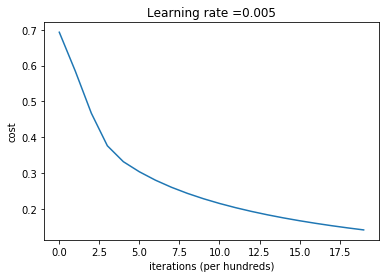

In [101]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [109]:
import numpy as np
from PIL import Image
cat=Image.open('D:\cat1.jpg')
rgbcat=cat.convert('RGB')
rgbcat.resize((384,256))
catlst=np.array(rgbcat.getdata())
train=catlst[0:64]
x=train.reshape((64*3,1))/255

In [110]:
w=np.zeros((64*3,1))
b=0

In [111]:
prediction=predict(w,b,x)

In [112]:
prediction

array([[0.]])